# Non Linear Spring Mass

In [1]:
import sys
import matplotlib
%matplotlib inline

import plotly
plotly.offline.init_notebook_mode(connected=True)
import plotly.offline as ply
import plotly.graph_objs as go

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 10]

In [13]:
def RK(x0, v0, F=10, w=1, Dt=0.1, k=0, c=0.1, a=1, itend=1000):
    """function description here"""
    g = lambda x, v, t : -c*v-k*x-a*x**3+F*np.cos(w*t)
    x = np.zeros(itend)
    v = np.zeros(itend)
    x[0] = x0
    v[0] = v0
    # Fourth order RK solver
    for it in range(1, itend):
        k1f = v[it-1]
        k1g = g(x[it-1], v[it-1], it*Dt)
        xhalf = x[it-1]+k1f*Dt/2
        vhalf = v[it-1]+k1g*Dt/2
       
        k2f = vhalf
        k2g = g(xhalf, vhalf, it*Dt)
        xhalf = x[it-1]+k2f*Dt/2
        vhalf = v[it-1]+k2g*Dt/2
        
        k3f = vhalf
        k3g = g(xhalf, vhalf, it*Dt)
        xwhole = x[it-1]+k3f*Dt
        vwhole = v[it-1]+k3g*Dt
        
        k4f = vwhole
        k4g = g(xwhole, vwhole, it*Dt)
        
        x[it] = x[it-1]+1/6*(k1f+2*k2f+2*k3f+k4f)*Dt
        v[it] = v[it-1]+1/6*(k1g+2*k2g+2*k3g+k4g)*Dt
    return (x, v)

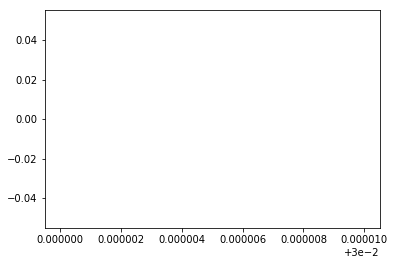

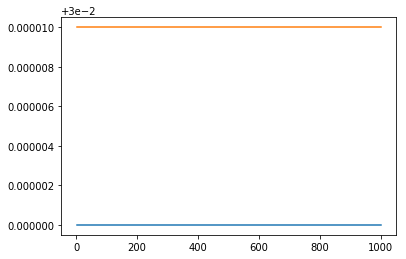

In [14]:
x1, v1 = RK(0.03, 0)
x2, v2 = RK(0.03001, 0)

plt.figure(1)
plt.plot(x1, v1, x2, v2)
plt.figure(2)
plt.plot(np.arange(1, 1001), x1, np.arange(1, 1001), x2)
plt.show()

In [15]:
data = []
data.append(go.Scatter(x=np.arange(1, 1001), y=x1, mode='lines+markers', name="1"))
data.append(go.Scatter(x=np.arange(1, 1001), y=x2, mode='lines+markers', name="2"))
ply.iplot({"data":data, "layout": go.Layout(title="Plot title")})